<a href="https://colab.research.google.com/github/alpha597/ML_LAB_ASSIGNMENTS/blob/main/ML_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/sample_data/winequality-red.csv', delimiter=';')

df.columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df=df.sample(frac=1.0).reset_index(drop=True)
df.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.8,0.600,0.18,1.9,0.079,18.0,86.0,0.99680,3.59,0.57,9.3,6
1,7.8,0.320,0.44,2.7,0.104,8.0,17.0,0.99732,3.33,0.78,11.0,7
2,8.0,0.430,0.36,2.3,0.075,10.0,48.0,0.99760,3.34,0.46,9.4,5
3,8.1,1.330,0.00,1.8,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,5
4,9.7,0.295,0.40,1.5,0.073,14.0,21.0,0.99556,3.14,0.51,10.9,6


In [4]:
class_distribution = df['quality'].value_counts()
print(class_distribution)

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


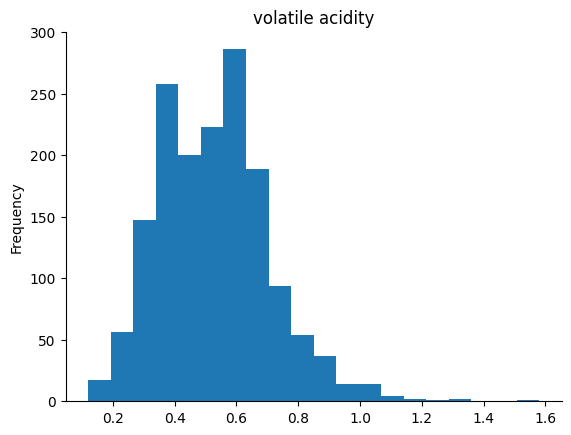

In [5]:
# @title volatile acidity

from matplotlib import pyplot as plt
df['volatile acidity'].plot(kind='hist', bins=20, title='volatile acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

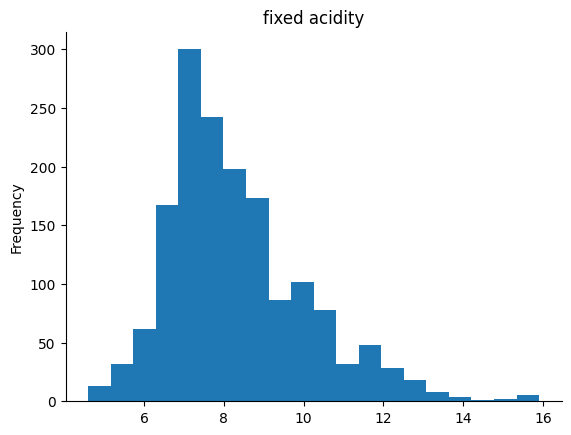

In [6]:
# @title fixed acidity

from matplotlib import pyplot as plt
df['fixed acidity'].plot(kind='hist', bins=20, title='fixed acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
from sklearn.metrics import roc_curve, auc


In [8]:
from sklearn.model_selection import train_test_split
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = SVC(kernel='linear', C=1, gamma=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred, zero_division=0))
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.63      0.74      0.68       137
           6       0.52      0.64      0.57       129
           7       0.00      0.00      0.00        40
           8       0.00      0.00      0.00         2

    accuracy                           0.57       320
   macro avg       0.19      0.23      0.21       320
weighted avg       0.48      0.57      0.52       320

[[  0   0   1   1   0   0]
 [  0   0   7   3   0   0]
 [  0   0 101  36   0   0]
 [  0   0  47  82   0   0]
 [  0   0   5  35   0   0]
 [  0   0   0   2   0   0]]


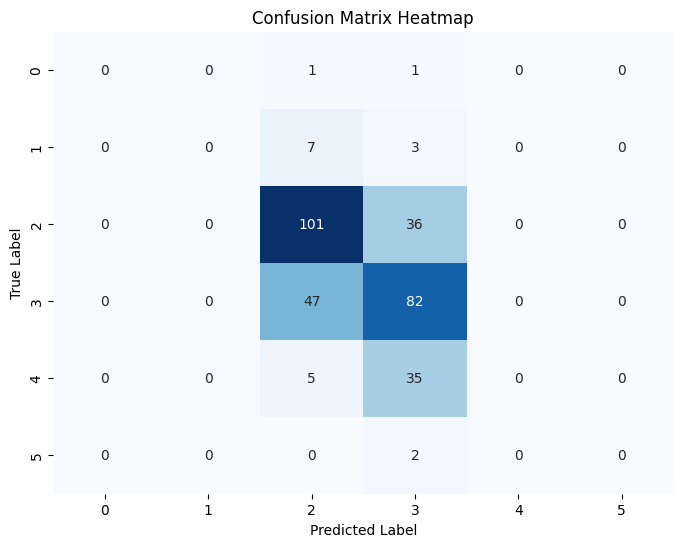

In [11]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.73      0.76      0.74       137
           6       0.63      0.75      0.68       129
           7       0.77      0.42      0.55        40
           8       0.00      0.00      0.00         2

    accuracy                           0.68       320
   macro avg       0.35      0.32      0.33       320
weighted avg       0.66      0.68      0.66       320

[[  0   0   0   2   0   0]
 [  0   0   4   6   0   0]
 [  0   0 104  33   0   0]
 [  0   0  28  97   4   0]
 [  0   0   7  16  17   0]
 [  0   0   0   1   1   0]]


/tmp/ipython-input-1239734081.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes) # Get a colormap for different classes


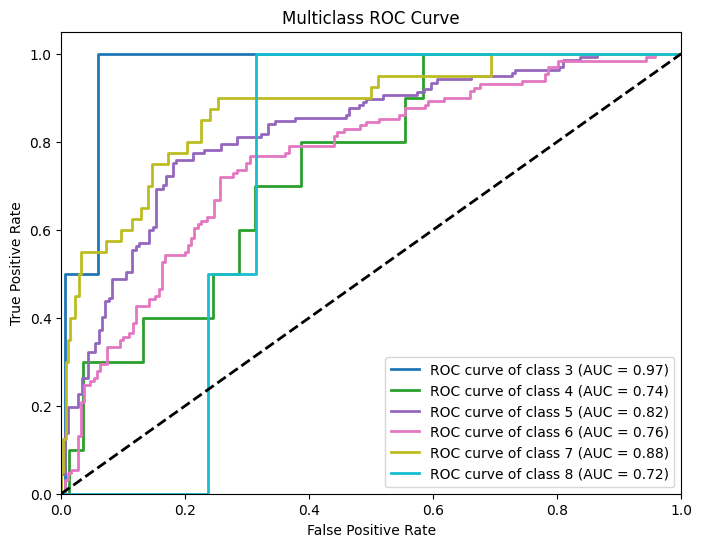

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

svc2 = SVC(kernel='rbf', C=1, gamma=1, probability=True) # Enable probability estimation
svc2.fit(X_train, y_train)
y_pred = svc2.predict(X_test)
y_prob = svc2.predict_proba(X_test) # Get predicted probabilities

print(classification_report(y_test, y_pred, zero_division=0))
print(confusion_matrix(y_test, y_pred))

# Calculate ROC curve and AUC for each class using One-vs-Rest strategy
n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=np.unique(y_test)[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('tab10', n_classes) # Get a colormap for different classes
for i, color in zip(range(n_classes), colors.colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {np.unique(y_test)[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.426 total time=   0.3s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.426 total time=   0.2s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.426 total time=   0.3s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.426 total time=   0.2s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.424 total time=   0.3s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.609 total time=   0.2s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.586 total time=   0.2s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.562 total time=   0.2s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.578 total time=   0.1s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.580 total time=   0.2s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.574 total time=   0.2s
[CV 2/5] END .................C=0.1, gamma=0.01;

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.67      0.66      0.67       137
           6       0.58      0.62      0.60       129
           7       0.59      0.57      0.58        40
           8       0.25      0.50      0.33         2

    accuracy                           0.61       320
   macro avg       0.35      0.39      0.36       320
weighted avg       0.60      0.61      0.60       320

[[ 0  1  1  0  0  0]
 [ 0  0  4  4  2  0]
 [ 0  4 91 40  2  0]
 [ 0  0 34 80 12  3]
 [ 0  0  5 12 23  0]
 [ 0  0  0  1  0  1]]


/tmp/ipython-input-2015785391.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes) # Get a colormap for different classes


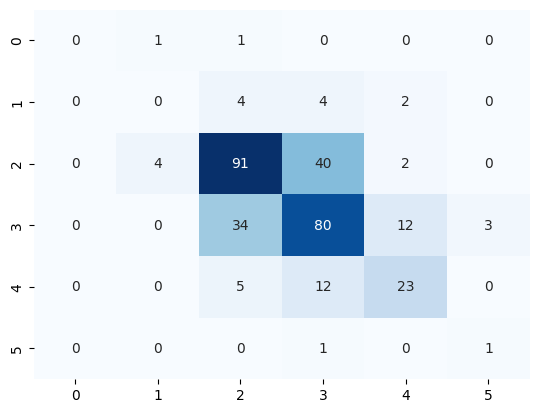

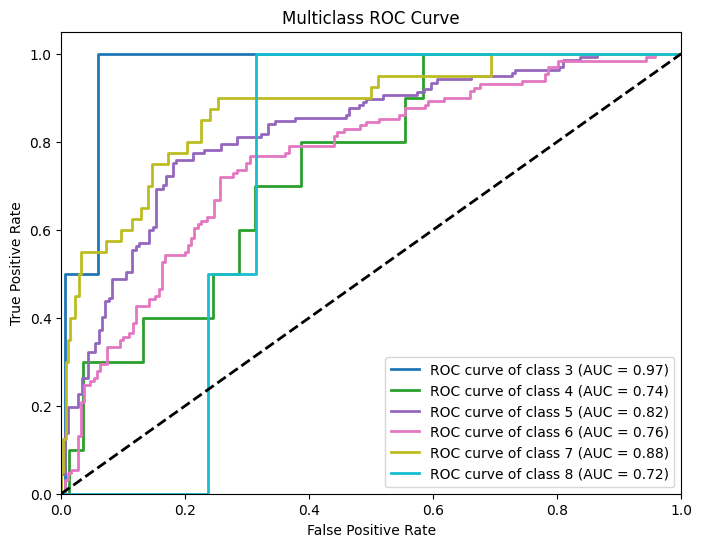

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_classifier.fit(X_train, y_train)
y_pred = mlp_classifier.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=np.unique(y_test)[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('tab10', n_classes) # Get a colormap for different classes
for i, color in zip(range(n_classes), colors.colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {np.unique(y_test)[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.73      0.75      0.74       137
           6       0.64      0.70      0.67       129
           7       0.63      0.55      0.59        40
           8       1.00      0.50      0.67         2

    accuracy                           0.68       320
   macro avg       0.50      0.42      0.44       320
weighted avg       0.65      0.68      0.66       320

[[  0   1   1   0   0   0]
 [  0   0   7   2   1   0]
 [  0   0 103  34   0   0]
 [  0   0  27  90  12   0]
 [  0   0   4  14  22   0]
 [  0   0   0   1   0   1]]


/tmp/ipython-input-2058330847.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes) # Get a colormap for different classes


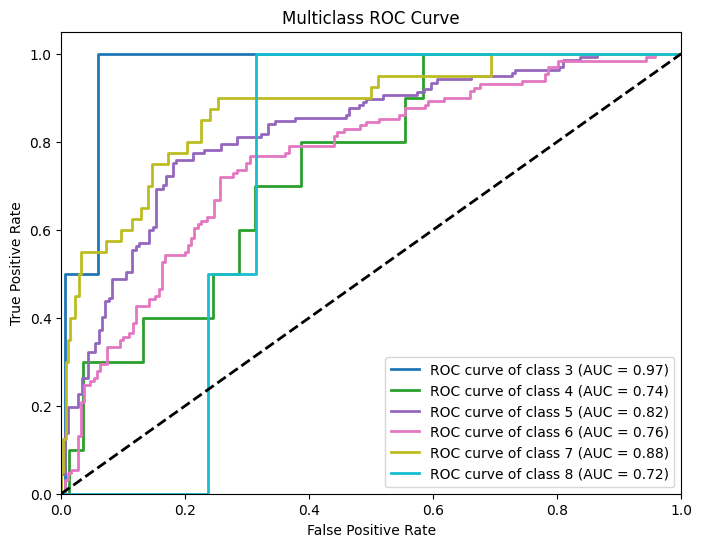

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))
print(confusion_matrix(y_test, y_pred))
n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=np.unique(y_test)[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('tab10', n_classes) # Get a colormap for different classes
for i, color in zip(range(n_classes), colors.colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {np.unique(y_test)[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.72      0.76      0.74       137
           6       0.62      0.66      0.64       129
           7       0.64      0.45      0.53        40
           8       0.20      0.50      0.29         2

    accuracy                           0.65       320
   macro avg       0.36      0.39      0.37       320
weighted avg       0.64      0.65      0.64       320

[[  0   1   1   0   0   0]
 [  0   0   5   4   1   0]
 [  0   4 104  28   1   0]
 [  0   1  32  85   8   3]
 [  0   0   2  19  18   1]
 [  0   0   0   1   0   1]]


/tmp/ipython-input-1520118886.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes) # Get a colormap for different classes


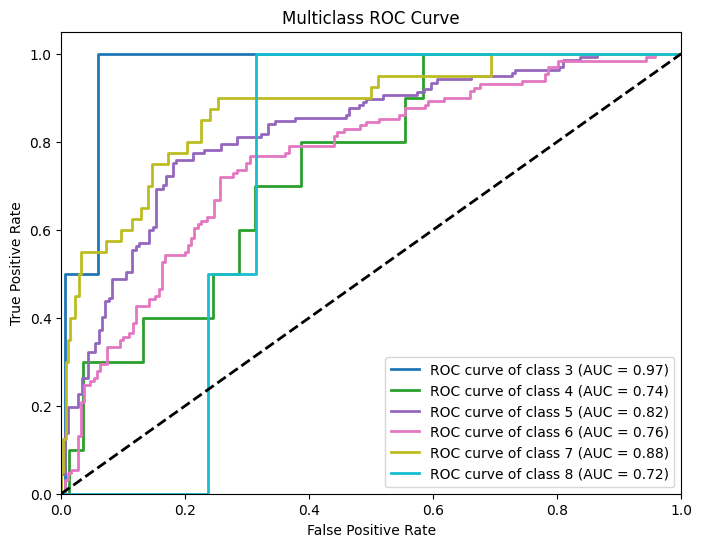

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))
print(confusion_matrix(y_test, y_pred))
n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=np.unique(y_test)[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('tab10', n_classes) # Get a colormap for different classes
for i, color in zip(range(n_classes), colors.colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {np.unique(y_test)[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)
X_pca_test, X_pca_train, y_pca_test, y_pca_train = train_test_split(X_pca, y, test_size=0.2, random_state=42)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.25      0.02      0.04        43
           5       0.63      0.66      0.64       544
           6       0.50      0.54      0.52       509
           7       0.45      0.43      0.44       159
           8       0.00      0.00      0.00        16

    accuracy                           0.55      1279
   macro avg       0.31      0.28      0.27      1279
weighted avg       0.53      0.55      0.54      1279

[[  0   0   7   1   0   0]
 [  1   1  24  16   1   0]
 [  1   3 360 162  18   0]
 [  0   0 178 274  57   0]
 [  1   0   5  84  69   0]
 [  0   0   1   7   8   0]]


<Axes: >

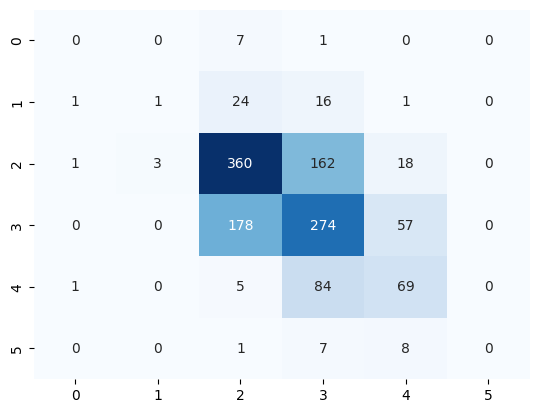

In [24]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_classifier.fit(X_pca_train, y_pca_train)
y_pred = mlp_classifier.predict(X_pca_test)
print(classification_report(y_pca_test, y_pred, zero_division=0))
print(confusion_matrix(y_pca_test, y_pred))
sns.heatmap(confusion_matrix(y_pca_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        43
           5       0.64      0.72      0.68       544
           6       0.55      0.63      0.59       509
           7       0.59      0.31      0.40       159
           8       1.00      0.06      0.12        16

    accuracy                           0.59      1279
   macro avg       0.46      0.29      0.30      1279
weighted avg       0.58      0.59      0.57      1279

[[  0   0   7   1   0   0]
 [  0   0  32   9   2   0]
 [  0   0 391 151   2   0]
 [  0   0 167 320  22   0]
 [  0   0  13  97  49   0]
 [  0   0   0   7   8   1]]


<Axes: >

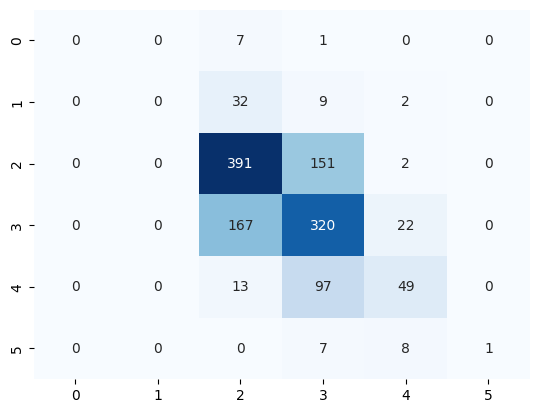

In [27]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_pca_train, y_pca_train)
y_pred = rf_classifier.predict(X_pca_test)
print(classification_report(y_pca_test, y_pred, zero_division=0))
print(confusion_matrix(y_pca_test, y_pred))
sns.heatmap(confusion_matrix(y_pca_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)